In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.convnext import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
model_path = '/content/drive/My Drive/Colab Notebooks/models/modelFT.keras'

# Load the model
model = load_model(model_path)

# Print the model summary to verify it's loaded
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_1 (GaussianNoise)     │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large (Functional)          │ (None, 1536)                │     196,230,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1536)                │           6,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         196,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 196,859,162 (750.96 MB)

 Trainable params: 208,584 (814.78 KB)

 Non-trainable params: 196,233,408 (748.57 MB)

 Optimizer params: 417,170 (1.59 MB)

In [ ]:
import numpy as np
from PIL import Image

# Load the .npz file
data = np.load('/content/drive/My Drive/Competition/training_set.npz')

# Extract images and labels from the file
images = data['images']  # Assuming images are stored under the key 'images'
labels = data['labels']  # Assuming labels are stored under the key 'labels'

In [ ]:
print("convnext_large")
print("Layer: convnext_large_stage_3_block_2_identity, Shape: (None, 3, 3, 1536)")

convnext_large
Layer: convnext_large_stage_3_block_2_identity, Shape: (None, 3, 3, 1536)


In [ ]:
last_conv_layer_name = "convnext_large_stage_3_block_2_layer_scale"
last_conv_layer = model.get_layer('convnext_large').get_layer("convnext_large_stage_3_block_2_layer_scale")

In [ ]:
grad_input = keras.layers.Input((96, 96, 3), name="grad_input")
target_layer = model.get_layer('convnext_large')
x = grad_input
for layer in target_layer.layers[1:]:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        break
outputs = x
last_conv_layer_model = keras.Model(grad_input, outputs)
last_conv_layer_model.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ grad_input (InputLayer)              │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_prestem_normalization │ (None, 96, 96, 3)           │               0 │
│ (Normalization)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stem (Sequential)     │ (None, 24, 24, 192)         │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_0_dept… │ (None, 24, 24, 192)         │           9,600 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_0_laye… │ (None, 24, 24, 192)         │             384 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_0_poin… │ (None, 24, 24, 768)         │         148,224 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_0_gelu  │ (None, 24, 24, 768)         │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_0_poin… │ (None, 24, 24, 192)         │         147,648 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_0_laye… │ (None, 24, 24, 192)         │             192 │
│ (LayerScale)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_0_iden… │ (None, 24, 24, 192)         │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_1_dept… │ (None, 24, 24, 192)         │           9,600 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_1_laye… │ (None, 24, 24, 192)         │             384 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_1_poin… │ (None, 24, 24, 768)         │         148,224 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_1_gelu  │ (None, 24, 24, 768)         │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_0_block_1_poin… │ (None, 24, 24, 192)         │         147,648 │
│ (Dense)                              │                             │              

 Total params: 196,227,264 (748.55 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 196,227,264 (748.55 MB)

In [ ]:
for layer in last_conv_layer_model.layers:
    print(layer.name)

grad_input
convnext_large_prestem_normalization
convnext_large_stem
convnext_large_stage_0_block_0_depthwise_conv
convnext_large_stage_0_block_0_layernorm
convnext_large_stage_0_block_0_pointwise_conv_1
convnext_large_stage_0_block_0_gelu
convnext_large_stage_0_block_0_pointwise_conv_2
convnext_large_stage_0_block_0_layer_scale
convnext_large_stage_0_block_0_identity
convnext_large_stage_0_block_1_depthwise_conv
convnext_large_stage_0_block_1_layernorm
convnext_large_stage_0_block_1_pointwise_conv_1
convnext_large_stage_0_block_1_gelu
convnext_large_stage_0_block_1_pointwise_conv_2
convnext_large_stage_0_block_1_layer_scale
convnext_large_stage_0_block_1_identity
convnext_large_stage_0_block_2_depthwise_conv
convnext_large_stage_0_block_2_layernorm
convnext_large_stage_0_block_2_pointwise_conv_1
convnext_large_stage_0_block_2_gelu
convnext_large_stage_0_block_2_pointwise_conv_2
convnext_large_stage_0_block_2_layer_scale
convnext_large_stage_0_block_2_identity
convnext_large_downsamplin

In [ ]:
classifier_layer_names = [
    'convnext_large_stage_3_block_2_identity',
    'global_average_pooling2d_1',
    'layer_normalization_1',
    'batch_normalization_1',
    'dense_3',
    'dense_4',
    'dropout_1',
    'dense_5'
]

In [ ]:
classifier_input = keras.Input(shape = last_conv_layer.output.shape[1:])
print(classifier_input)
x = classifier_input
start_processing = True
for layer_name in classifier_layer_names:
  if not start_processing:
    x = model.get_layer(layer_name)(x)
  if start_processing:
    x = model.get_layer("convnext_large").get_layer(layer_name)(x)
  if layer_name == 'layer_normalization_1':
    start_processing = False
classifier_model = keras.Model(classifier_input, x)

<KerasTensor shape=(None, 3, 3, 1536), dtype=float32, sparse=False, name=keras_tensor_3166>


In [ ]:
classifier_model.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 3, 3, 1536)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_large_stage_3_block_2_iden… │ (None, 3, 3, 1536)          │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 1536)                │           3,072 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1536)                │           6,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         196,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 214,728 (838.78 KB)

 Trainable params: 208,584 (814.78 KB)

 Non-trainable params: 6,144 (24.00 KB)

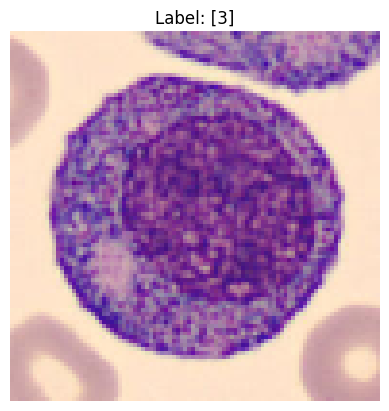

In [ ]:
# Select an image (e.g., first image)
selected_index = 15
selected_image = images[selected_index]
selected_label = labels[selected_index]

# Visualize the selected image
plt.imshow(selected_image)
plt.axis('off')
plt.title(f"Label: {selected_label}")
plt.show()

In [ ]:
plt.imsave('selected_image.jpg', selected_image)

In [ ]:
# Step 1: Load and preprocess the image
image_array = tf.image.resize(selected_image, (96, 96))  # Resize to (96, 96)

image_array = img_to_array(image_array)  # Convert to NumPy array

image_array = image_array / 255.0

image_array = tf.cast(image_array, dtype=tf.float32)  # Ensure float32

# Step 3: Add batch dimension
image_array = tf.expand_dims(image_array, axis=0)   # Shape: (1, 96, 96, 3

In [ ]:
last_conv_layer_output = last_conv_layer_model(image_array)
print(last_conv_layer_output)

tf.Tensor(
[[[[ 0.07842034 -0.01046925 -0.10873456 ... -0.27641717 -0.08069879
     0.13252169]
   [ 0.07852732 -0.03387246 -0.08606689 ... -0.17644486 -0.09462254
     0.1035412 ]
   [ 0.08035421 -0.02034264 -0.10111773 ... -0.24416125 -0.0812277
     0.12914956]]

  [[ 0.08393433 -0.03265552 -0.09550045 ... -0.21587394 -0.09005873
     0.11480647]
   [ 0.08881897 -0.04829967 -0.13369401 ... -0.28074118 -0.08539778
     0.13572723]
   [ 0.0853243  -0.03348549 -0.09849451 ... -0.231591   -0.08702168
     0.12194408]]

  [[ 0.0817337  -0.0253463  -0.08997456 ... -0.21333547 -0.0869318
     0.12182851]
   [ 0.0803006  -0.0321806  -0.09511474 ... -0.21303666 -0.09311154
     0.11651911]
   [ 0.08079955 -0.02747736 -0.08550937 ... -0.19496532 -0.08654135
     0.11729815]]]], shape=(1, 3, 3, 1536), dtype=float32)


In [ ]:
with tf.GradientTape() as tape:
  last_conv_layer_output = last_conv_layer_model(image_array)
  tape.watch(last_conv_layer_output)
  preds = classifier_model(last_conv_layer_output)
  top_pred_index = tf.argmax(preds[0])
  top_class_channel = preds[:, top_pred_index]
grads = tape.gradient(top_class_channel, last_conv_layer_output)
print(grads)
print(top_pred_index)
print(top_class_channel)

tf.Tensor(
[[[[ 0.00068322  0.00438611 -0.00173143 ... -0.00394228  0.00023937
    -0.00033959]
   [ 0.00068322  0.00438611 -0.00173143 ... -0.00394228  0.00023937
    -0.00033959]
   [ 0.00068322  0.00438611 -0.00173143 ... -0.00394228  0.00023937
    -0.00033959]]

  [[ 0.00068322  0.00438611 -0.00173143 ... -0.00394228  0.00023937
    -0.00033959]
   [ 0.00068322  0.00438611 -0.00173143 ... -0.00394228  0.00023937
    -0.00033959]
   [ 0.00068322  0.00438611 -0.00173143 ... -0.00394228  0.00023937
    -0.00033959]]

  [[ 0.00068322  0.00438611 -0.00173143 ... -0.00394228  0.00023937
    -0.00033959]
   [ 0.00068322  0.00438611 -0.00173143 ... -0.00394228  0.00023937
    -0.00033959]
   [ 0.00068322  0.00438611 -0.00173143 ... -0.00394228  0.00023937
    -0.00033959]]]], shape=(1, 3, 3, 1536), dtype=float32)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor([0.35353285], shape=(1,), dtype=float32)


In [ ]:
print(top_pred_index)

tf.Tensor(2, shape=(), dtype=int64)


In [ ]:
print(top_class_channel)

tf.Tensor([0.35353255], shape=(1,), dtype=float32)


In [ ]:
pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

In [ ]:
print(pooled_grads)

tf.Tensor(
[ 0.00068322  0.00438611 -0.00173143 ... -0.00394229  0.00023936
 -0.00033959], shape=(1536,), dtype=float32)


In [ ]:
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):
  last_conv_layer_output[:,:,i] *= pooled_grads[i]

In [ ]:

heatmap = np.mean(last_conv_layer_output, axis=-1)

In [ ]:
print(heatmap)

[[ 2.5102574e-06 -2.6366413e-06  1.4667206e-06]
 [-1.1950045e-06  7.8998829e-07 -7.5258322e-07]
 [ 6.2772352e-07 -5.5904974e-07 -2.5135068e-07]]


In [ ]:
heatmap = np.maximum(heatmap,0)/np.max(heatmap)

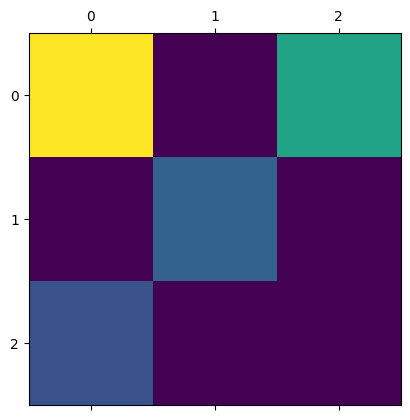

In [ ]:
plt.matshow(heatmap)
plt.show()

<ipython-input-148-1db312c24d9a>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


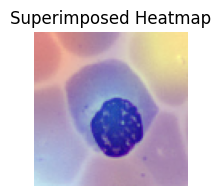

In [ ]:
import matplotlib.cm as cm

heatmap = np.uint8(255 * heatmap)

jet = cm.get_cmap("jet")

jet_colors = jet(np.arange(256))[:,:3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((selected_image.shape[1],selected_image.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap * 0.4 + selected_image
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Assuming superimposed_img is already created
plt.figure(figsize=(2, 2))
plt.imshow(superimposed_img)
plt.axis("off")  # Hide axis for better visualization
plt.title("Superimposed Heatmap")
plt.show()
